In [98]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import itertools as it

def init_grid(grid_dimensions: tuple, fig_dimensions: tuple, caption_height: int = 0, **kwargs) -> tuple:
    """ Initializes a grid of figures of correct dimension.

    To use this, please call plt.subplot(*grid_dimensions, next(counter)) before each figure to
    include in the grid

    Args:
        grid_dimensions: The dimension of grid (num rows, num columns)
        fig_dimensions: The dimension of each figure in the grid (width, height)
        caption_height: The height of the caption
        **kwargs: Additional arguments to pass to plt.figure

    Returns:
        tuple of (grid_dimensions, fig_dimensions, counter)

    """
    counter = it.count(1)
    plt.figure(figsize=(grid_dimensions[1] * fig_dimensions[0],
                        grid_dimensions[0] * fig_dimensions[1] + caption_height), **kwargs)
    return grid_dimensions, fig_dimensions, counter

In [ ]:
metadata = pd.read_csv("rna_sample_sheet.txt", sep="\t")
metadata.index = metadata.sampleName
metadata.head()

In [ ]:
plotdir = "../{plotdir}/03-rna/02/"
os.makedirs(plotdir, exist_ok=True)

### check expression level of our TFs

In [ ]:
tpm = pd.read_csv("../../output/03-rna/01/raw_TPM_abundance.tsv", sep="\t") # use kallisto tpm abundance
tpm

In [101]:
pd.unique(metadata.TF)

array(['SP4', 'ELF1', 'FOXP1', 'GATA1', 'BACH2', 'FOXO1', 'FOXP3', 'IRF4',
       'GFP', 'IKZF2', 'LEF1', 'NR4A1', 'PRDM1', 'XBP1', 'ALX4', 'TCF3',
       'MXD1', 'OCT4', 'KLF4', 'EF1a-KLF1', 'SOX2', 'MYC', 'EF1a-SPI1',
       'tet-CTCF'], dtype=object)

In [102]:
genenames = ['SP4', 'ELF1', 'FOXP1', 'GATA1', 'BACH2', 
             'FOXO1', 'FOXO1-syn', 'FOXP3', 'IRF4', 'IKZF2', 
             'LEF1', 'NR4A1', 'PRDM1', 'XBP1', 'XBP1-syn', 
             'ALX4', 'TCF3', 'MXD1', 'OCT4', 'KLF4', 
             'KLF1', 'KLF1-syn', 'SOX2', 'MYC', 'SPI1']
genes = ['ENSG00000105866', 'ENSG00000120690', 'ENSG00000114861', 'ENSG00000102145', 'ENSG00000112182',
         'ENSG00000150907', 'ENSG90000150907', 'ENSG00000049768', 'ENSG00000137265', 'ENSG00000030419',
         'ENSG00000138795', 'ENSG00000123358', 'ENSG00000057657', 'ENSG00000100219', 'ENSG90000100219',
         'ENSG00000052850', 'ENSG00000071564', 'ENSG00000059728', 'ENSG00000206454', 'ENSG00000136826',
         'ENSG00000105610', 'ENSG90000105610', 'ENSG00000181449', 'ENSG00000136997', 'ENSG00000066336']

df = tpm.loc[genes].transpose()
df.columns = genenames

df = df.merge(metadata[["Plasmid_Dose", "TF", "Replicate","PlateNum", "TF_Dose"]],left_index=True, right_index=True)

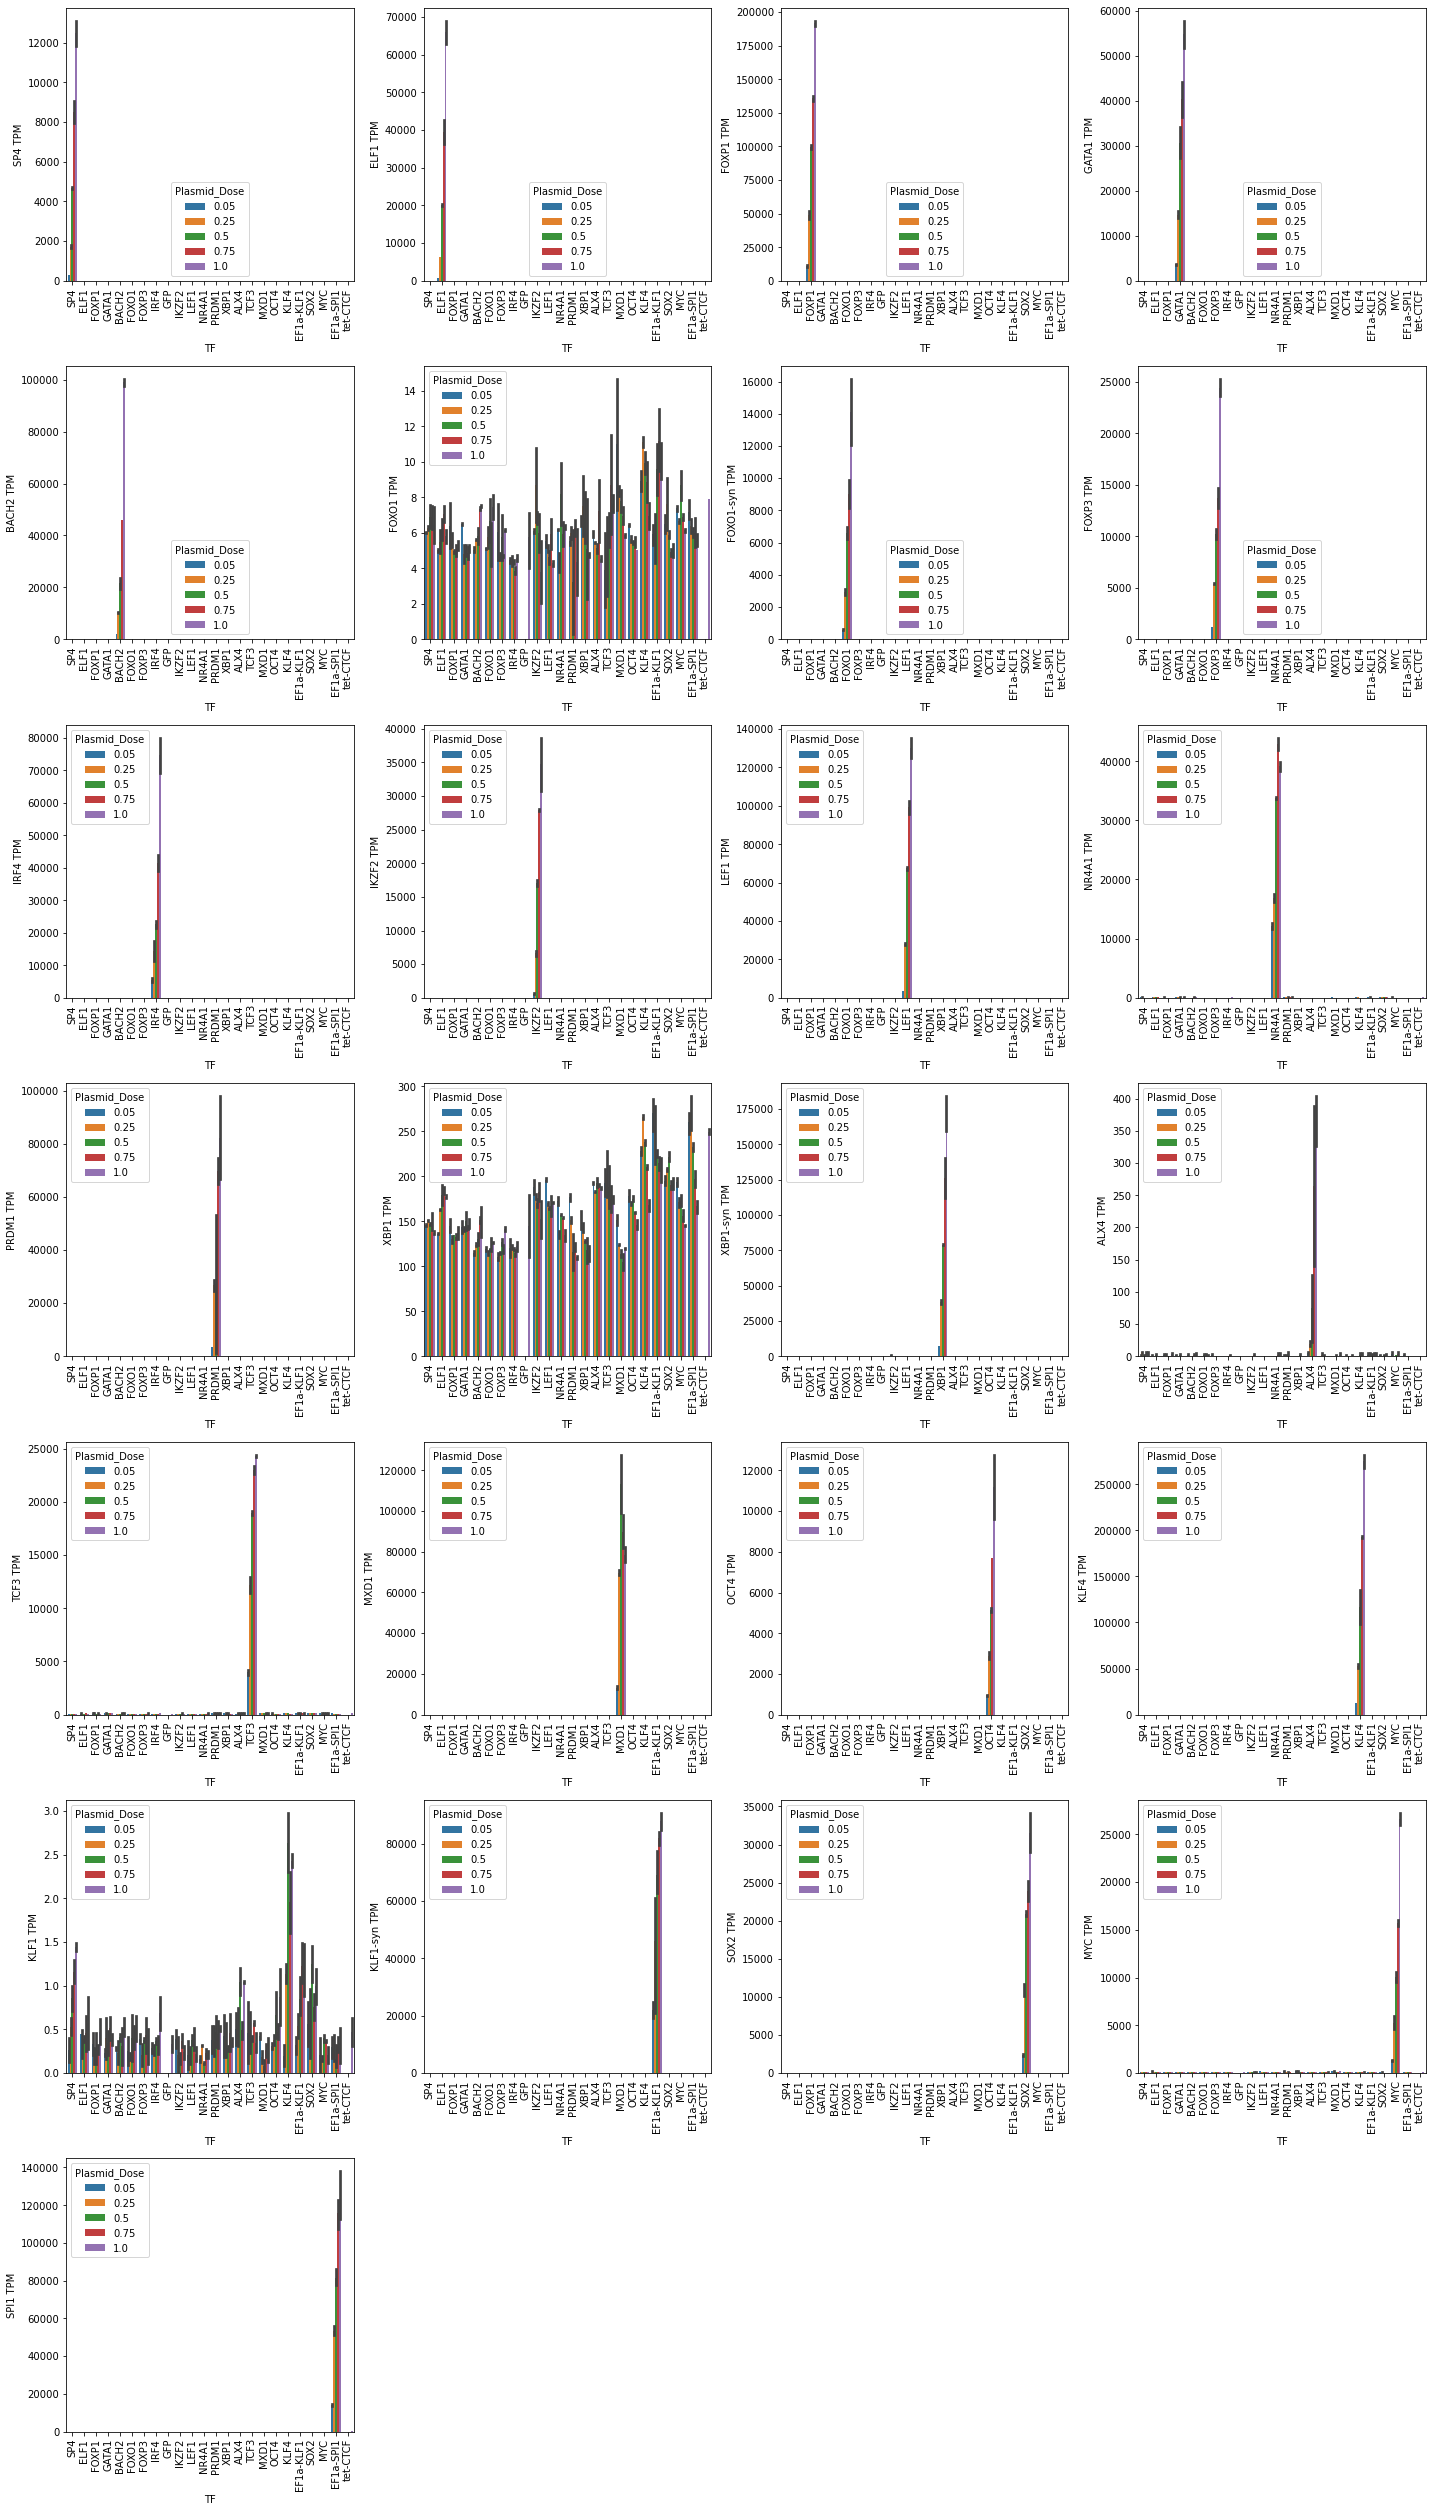

In [104]:
for celltype in ["HEK293T"]:
    cols = metadata[metadata.CellType==celltype].index
    dfsub = df.loc[cols]

    g, d, c = init_grid((len(genenames)//4+1,4), (5,5))
    for tf in genenames:
        plt.subplot(*g, next(c))
        sns.barplot(dfsub, x="TF", y=tf, hue="Plasmid_Dose")
        plt.ylabel(tf + " TPM")
        plt.xticks(rotation=90)
    plt.tight_layout()
    plt.savefig(f"{plotdir}/TPM_TF_{celltype}.pdf")

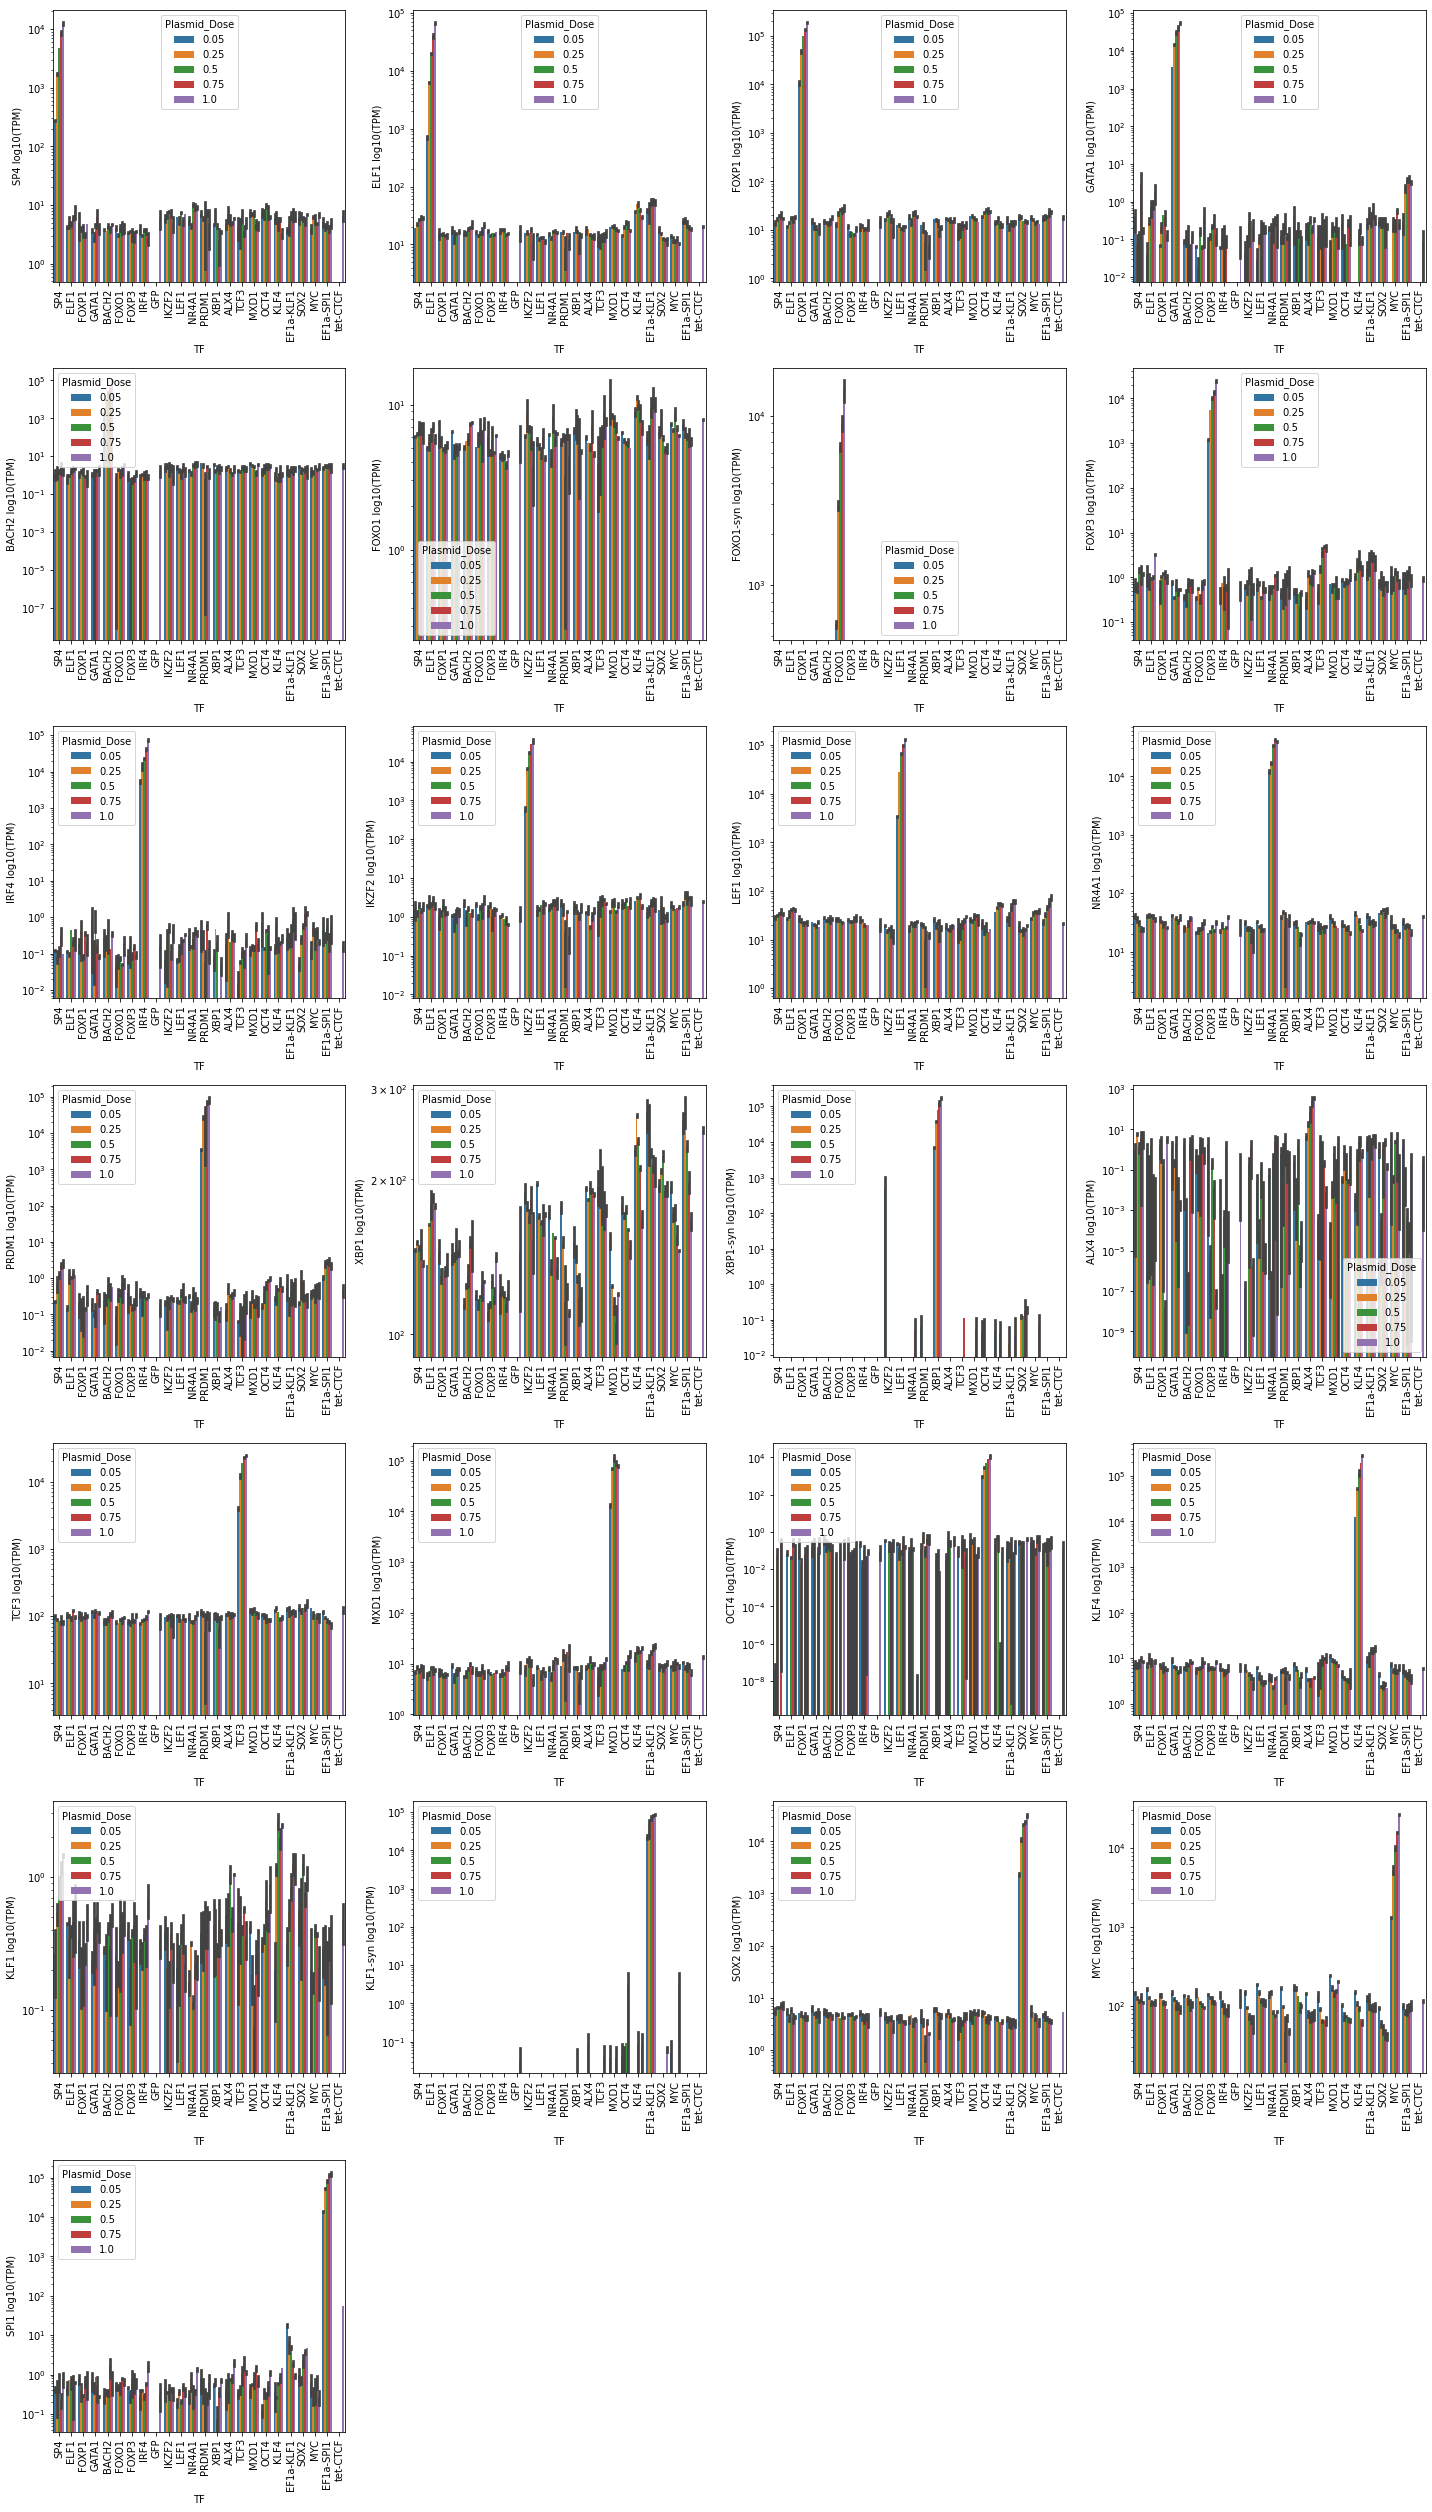

In [105]:
for celltype in ["HEK293T"]:
    cols = metadata[metadata.CellType==celltype].index
    dfsub = df.loc[cols]

    g, d, c = init_grid((len(genenames)//4+1,4), (5,5))
    for tf in genenames:
        plt.subplot(*g, next(c))
        sns.barplot(dfsub, x="TF", y=tf, hue="Plasmid_Dose")
        plt.yscale("log")
        plt.ylabel(tf+" log10(TPM)")
        plt.xticks(rotation=90)
    plt.tight_layout()
    plt.savefig(f"{plotdir}/log10TPM_TF_{celltype}.pdf")

In [106]:
def tf_cleandose(df, tf):
    # given a dataframe with columns "TF" "Plasmid_Dose" and a TF of interest, output its dose in column "plasmidDose"
    if "-syn" in tf:
        tff=tf.split("-")[0]
    else:
        tff = tf
    
#    dfsub = df[df.TF.str.contains(tff) | (df.TF=="GFP") | (df.TF=="tet-CTCF")]
    dfsub = df[df.TF.str.contains(tff) | (df.TF=="GFP")]    
    if tff in ["KLF1", "SPI1"]:
        tff = f"EF1a-{tff}"
        
    dfsub["plasmidDose"] = 0 # default everything to 0 first
    for i in dfsub.index:        
        if dfsub.loc[i, "TF"]==tff:
            dfsub.loc[i, "plasmidDose"] = dfsub.loc[i, "Plasmid_Dose"]
    return dfsub

/oak/stanford/groups/wjg/bliu/software/miniconda3/envs/bpaffinity/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/oak/stanford/groups/wjg/bliu/software/miniconda3/envs/bpaffinity/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/oak/stanford/groups/wjg/bliu/software/miniconda3/envs/bpaffinity/lib/python3.7/site-packages/ipykernel_launcher.py:

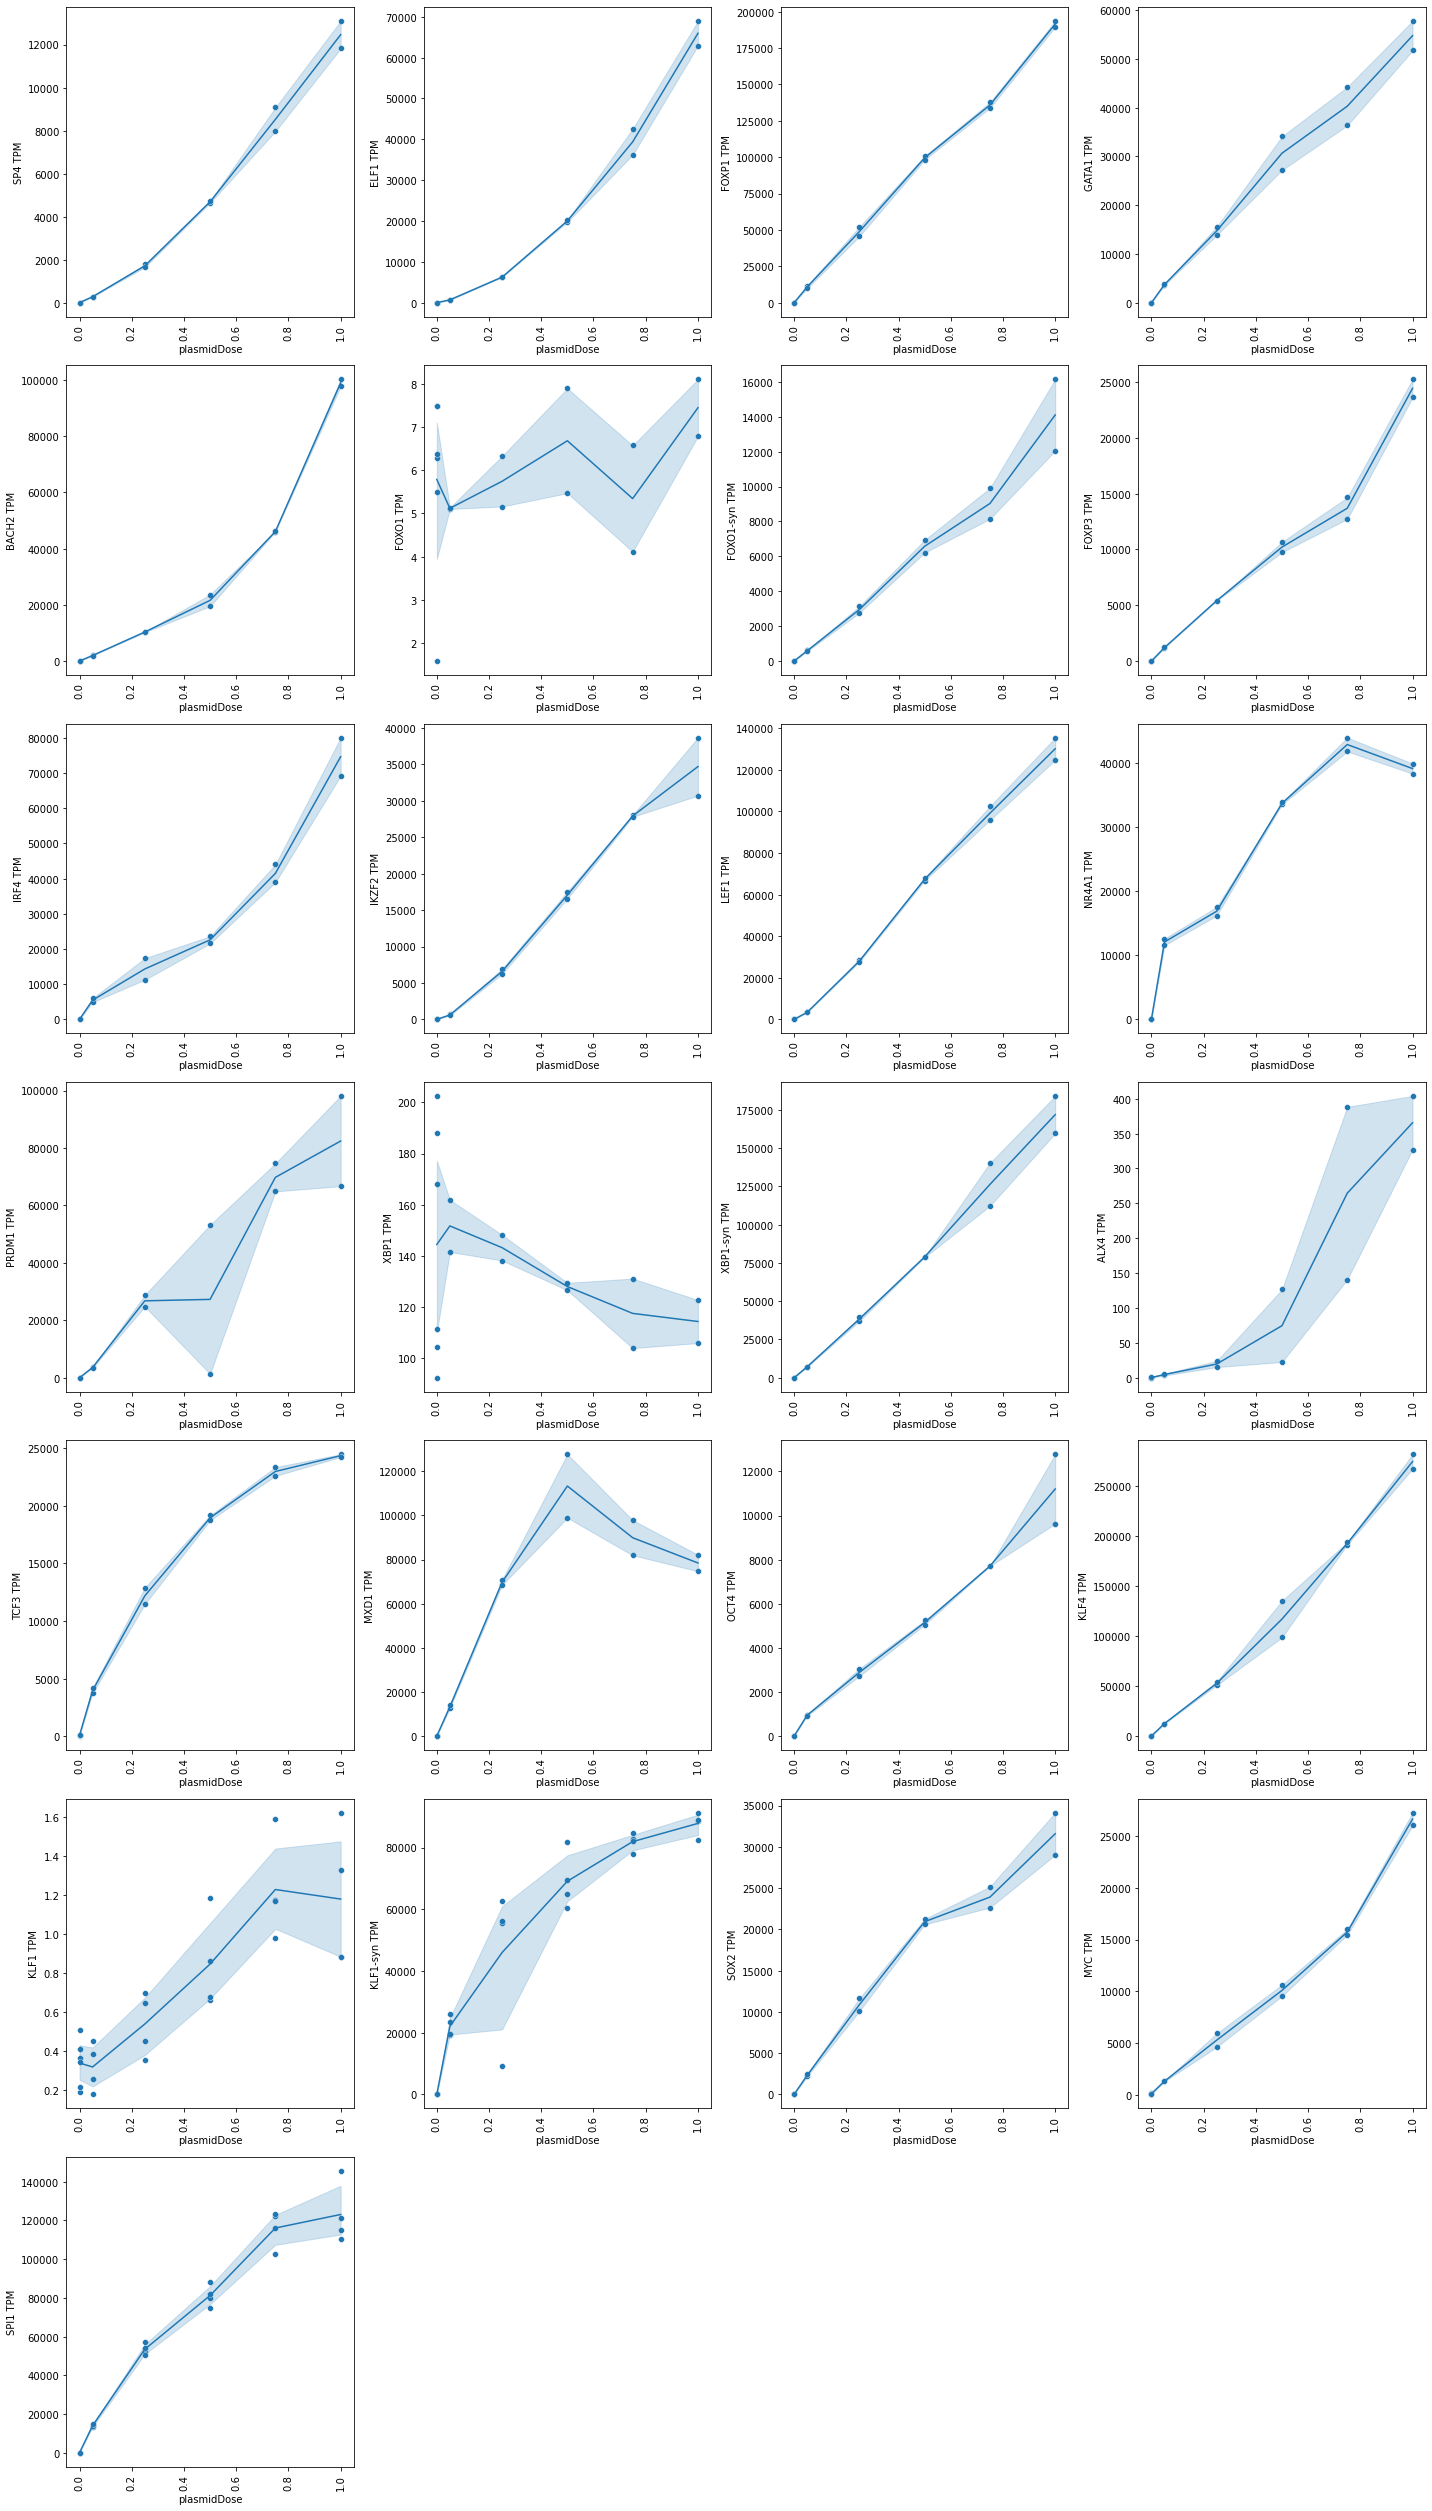

In [107]:
for celltype in ["HEK293T"]:
    # remove outlier 
    cols = metadata[(metadata.CellType==celltype)].index
    dfsub = df.loc[cols]
    
    g, d, c = init_grid((len(genenames)//4+1,4), (5,5))
    for tf in genenames:
        plt.subplot(*g, next(c))

        tmp = tf_cleandose(dfsub,tf) 

        sns.scatterplot(tmp, x="plasmidDose", y=tf)
        sns.lineplot(tmp, x="plasmidDose", y=tf)
        plt.ylabel(tf+" TPM")
        plt.xticks(rotation=90)
    plt.tight_layout()
    plt.savefig(f"{plotdir}/lineTPM_{celltype}_noctcf.pdf")